In [3]:
import numpy as np
import matplotlib.pyplot as plt

from core.functions import *
from core.gradient import *
from data.load_mnist import load_mnist

from core.network.twolayernet import TwoLayerNet, BackPropagationNet

In [4]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)

In [5]:
network = TwoLayerNet(784, 50, 10)

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = X_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = T_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'B1', 'W2', 'B2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, T_train)
        test_acc = network.accuracy(X_test, T_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7957, 0.8001
train acc, test acc | 0.8801333333333333, 0.8836
train acc, test acc | 0.89915, 0.9028
train acc, test acc | 0.9078166666666667, 0.9104
train acc, test acc | 0.91295, 0.9168
train acc, test acc | 0.9199, 0.9202
train acc, test acc | 0.9234333333333333, 0.9263
train acc, test acc | 0.9277333333333333, 0.9291
train acc, test acc | 0.9312, 0.9309
train acc, test acc | 0.9339, 0.9356
train acc, test acc | 0.9369, 0.9369
train acc, test acc | 0.9393333333333334, 0.9401
train acc, test acc | 0.941, 0.9406
train acc, test acc | 0.9432833333333334, 0.9438
train acc, test acc | 0.9456333333333333, 0.9448
train acc, test acc | 0.9476833333333333, 0.9467


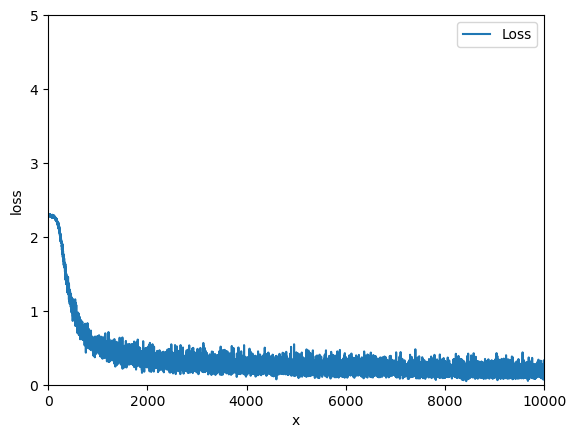

In [11]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.show()

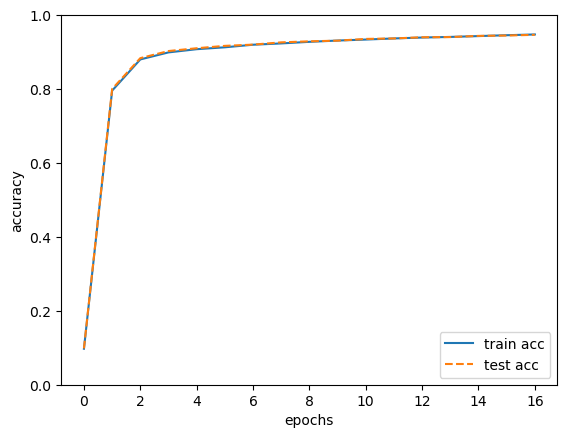

In [12]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

In [13]:
print(f"final loss: {train_loss_list[-1]}")
print(f"final train accuracy: {train_acc_list[-1]}")
print(f"final test accuracy: {test_acc_list[-1]}")

final loss: 0.11480554804865645
final train accuracy: 0.9476833333333333
final test accuracy: 0.9467
